Question 1

step 1

In [10]:
import numpy as np


In [3]:
import pandas as pd


Step 2: Import the dataset from this address.

Step 3: Assign it to a variable called users.

In [11]:
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
users.head(20)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


step 4 - Discover what is the mean age per occupation

In [13]:
users[["age", "occupation"]].groupby("occupation").mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


Step 5: Discover the Male ratio per occupation and sort it from the most to the least

In [12]:

def conv_gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0
    
users['gender_num'] = users['gender'].apply(conv_gender_to_numeric)

ratio = users.groupby('occupation').gender_num.sum() / users.occupation.value_counts() * 100 

ratio.sort_values(ascending = False)




doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

Step 6: For each occupation, calculate the minimum and maximum ages

In [15]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 7: For each combination of occupation and sex, calculate the mean age


In [7]:

users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

step 8: For each occupation, present the percentage of women and men


In [16]:

gender_occup_count = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occup_count = users.groupby(['occupation']).agg('count')
occup_gender_percent = gender_occup_count.div(occup_count, level = "occupation") * 100
occup_gender_percent.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

Question 2

In [95]:
# Import the necessary libraries


import numpy as np

import pandas as pd

step 2 -Import the dataset from this address

step 3 - Assign it to a variable called euro12

In [17]:
 
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head(20)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


step 4 Select only the Goal column


In [18]:

euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5: How many team participated in the Euro2012?

In [20]:

teams_participated = euro12['Team'].count()
print(teams_participated, "teams participated in Euro2012")

16 teams participated in Euro2012


Step 6: What is the number of columns in the dataset?

In [21]:

columns = len(euro12.axes[1])
print("Number of Columns: ", columns)

Number of Columns:  35


Step 7: View only the columns Team, Yellow Cards, and Red Cards and assign them to a dataframe called discipline

In [22]:

discipline= pd.DataFrame(euro12, columns = ['Team','Red Cards','Yellow Cards'])
discipline


,Team,Red Cards,Yellow Cards
0,Croatia,0,9
1,Czech Republic,0,7
2,Denmark,0,4
3,England,0,5
4,France,0,6
5,Germany,0,4
6,Greece,1,9
7,Italy,0,16
8,Netherlands,0,5
9,Poland,1,7


Step 8: Sort the teams by Red Cards, then to Yellow Cards

In [23]:

discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
discipline

,Team,Red Cards,Yellow Cards
0,Croatia,0,9
1,Czech Republic,0,7
2,Denmark,0,4
3,England,0,5
4,France,0,6
5,Germany,0,4
6,Greece,1,9
7,Italy,0,16
8,Netherlands,0,5
9,Poland,1,7


Step 9: Calculate the mean Yellow Cards given per Team

In [27]:

Mean_Yellow_Cards = discipline['Yellow Cards'].mean()
print("Mean Yellow Cards given per Team:", Mean_Yellow_Cards)

Mean Yellow Cards given per Team: 7.4375


Step 10: Filter teams that scored more than 6 goals

In [29]:

goals_over_6 = euro12['Goals'] > 6
euro12[goals_over_6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


Step 11: Select the teams that start with G

In [30]:

euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12: Select the first 7 columns

In [31]:

euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 13: Select all columns except the last 3

In [63]:

euro12.loc[:, ~euro12.columns.isin(['Subs on', 'Subs off', 'Players Used'])]  

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14: Present only the Shooting Accuracy from England, Italy and Russia

In [64]:

euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


Question 3

Step 1: Import the necessary libraries

In [28]:
import numpy as np
import pandas as pd
import random

Step 2: Create 3 differents Series, each of length 100, as follows:

In [29]:
# first random number from 1-4
first_series = [[random.randint(1, 4)] for i in range(100)]
df_first = pd.DataFrame(first_series)
df_first

,0
0,3
1,2
2,2
3,1
4,3
...,...
95,2
96,3
97,4
98,2


In [30]:
#The second a random number from 1-3

second_series = [[random.randint(1, 3)] for i in range(100)]
df_second = pd.DataFrame(second_series)
df_second

,0
0,3
1,2
2,3
3,2
4,3
...,...
95,2
96,3
97,2
98,1


In [31]:
#The third a random number from 10,000 - 30,000

third_series = [[random.randint(10000, 30000)] for i in range(100)]
df_third = pd.DataFrame(third_series)
df_third

,0
0,24104
1,24129
2,18396
3,29394
4,21754
...,...
95,26136
96,17455
97,21625
98,24206


Step 3: Create a DataFrame by joinning the Series by column

In [32]:

df = pd.concat([df_first, df_second, df_third], axis=1)
df

,0,0,0
0,3,3,24104
1,2,2,24129
2,2,3,18396
3,1,2,29394
4,3,3,21754
...,...,...,...
95,2,2,26136
96,3,3,17455
97,4,2,21625
98,2,1,24206


Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [33]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,3,3,24104
1,2,2,24129
2,2,3,18396
3,1,2,29394
4,3,3,21754
...,...,...,...
95,2,2,26136
96,3,3,17455
97,4,2,21625
98,2,1,24206


Step 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [34]:

df_new = df.bedrs.astype(str).str.cat(df.bathrs.astype(str)).str.cat(df.price_sqr_meter.astype(str))
df_new.columns = ['bigcolumn']
df_new

0     3324104
1     2224129
2     2318396
3     1229394
4     3321754
       ...   
95    2226136
96    3317455
97    4221625
98    2124206
99    2217378
Name: bedrs, Length: 100, dtype: object

Step 6: Ops it seems it is going only until index 99. Is it true?

In [73]:

Soution: True

print(df_new)

0     4128501
1     2311782
2     1320567
3     3316827
4     3216771
       ...   
95    2219508
96    2323974
97    2311103
98    1220248
99    3326148
Name: bedrs, Length: 100, dtype: object


Step 7: Reindex the DataFrame so it goes from 0 to 299

In [74]:

df_new.reset_index()
df_new.reindex(index=range(0,299))

0      4128501
1      2311782
2      1320567
3      3316827
4      3216771
        ...   
294        NaN
295        NaN
296        NaN
297        NaN
298        NaN
Name: bedrs, Length: 299, dtype: object

Question 8: Create a horizontal bar chart that compares the deadliest actors in Hollywood.
            Sort the actors by their kill count and label each bar with the corresponding actor's name. 
            Don't forget to label your axes!

In [35]:

import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("actor_kill_counts.csv")
df.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


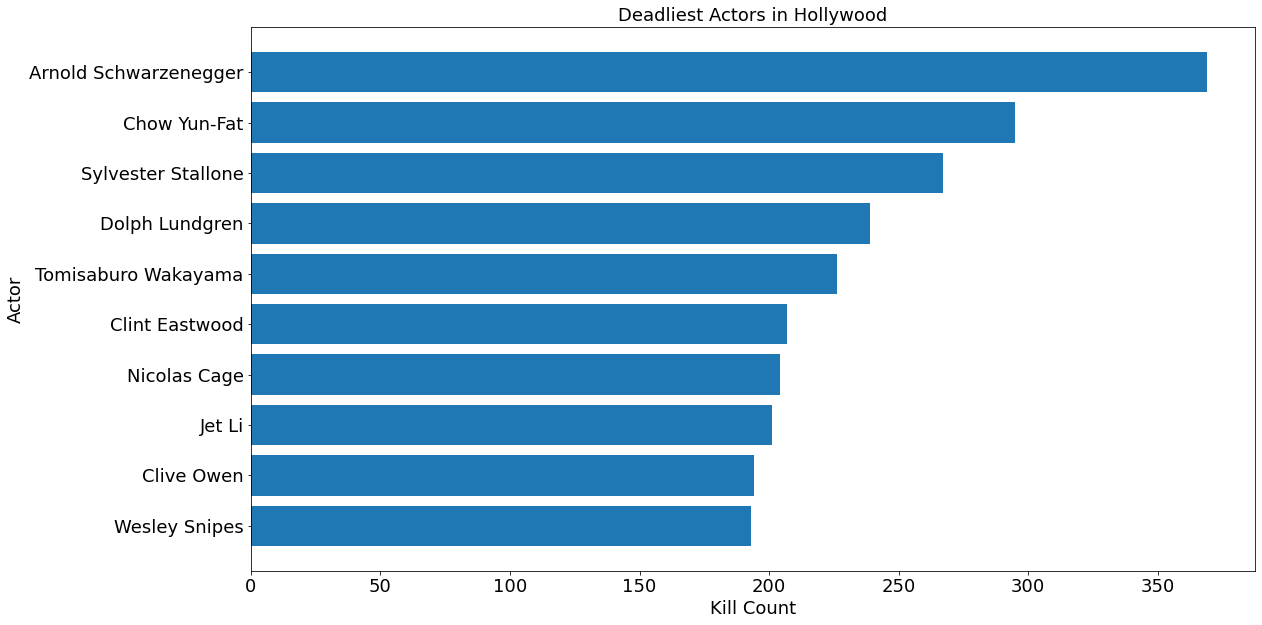

In [39]:
plt.figure(figsize=(18,10))
plt.barh(df.Actor,df.Count,align='center')
df = df.sort_values('Count',ascending = True)
plt.title('Deadliest Actors in Hollywood',fontsize=18)
plt.xlabel('Kill Count',fontsize=18)
plt.ylabel('Actor',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Question 9: Create a pie chart showing the fraction of all Roman Emperors that were assassinated. 
            Make sure that the pie chart is an even circle, labels the categories,
            and shows the percentage breakdown of the categories.

In [46]:


import pandas as pd
roman_emporer = pd.read_csv("roman-emperor-reigns.csv")
roman_emporer.head()
from plotly.offline import iplot

pie1 = roman_emporer.Cause_of_Death
labels = roman_emporer.Cause_of_Death

fig = {  "data": [   {
      "labels": labels,
      "domain": {"x": [.4, .10]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": 0,
      "type": "pie"
    },],
    
    
  "layout": {
        "title":" Roman Emporer causes of death",
         
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
                "text":"",
                "x": 0.20,
                "y": 1
            },]}}
iplot(fig)

Question 10:Create a scatter plot showing the relationship between the total revenue earned by
            arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
            Don't forget to label your axes! Color each dot according to its year.

In [47]:

import pandas as pd

import seaborn as sns

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

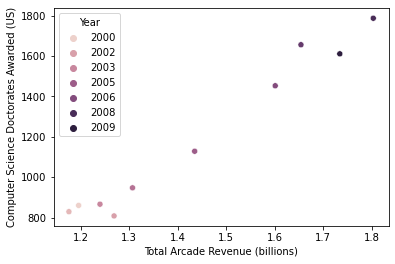

In [48]:
total_revenue = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year', 
                data=total_revenue)